<h1>Personal Insurance Charge Predictor</h1>


<h2>Life cycle of a Machine learning Project</h2>  

-> Understanding the Problem Statement  
-> Data Collection  
-> Data Checks to perform  
-> Exploratory data analysis  
-> Data Pre-Processing  
-> Model Training  
-> Choose best model  

<h2> 1. Problem Statement </h2>  

This project predicts how various factors such as age, sex, bmi, region of residence etc have an impact on the individual's personal insurance charges.  

<h2>2. Data Collection</h2>

-> Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance  
-> The data consists of 7 columns and 1338 rows

<h2>2.1 Import Data and Required Packages</h2>

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h2>Import the CSV Data as Pandas DataFrame</h2>

In [2]:
df = pd.read_csv('data/insurance.csv')

In [3]:
df.head()           #Show top 5 records

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#shape of the dataset

df.shape

(1338, 7)

<h2>2.2 Dataset Information</h2>

sex : gender of the person -> (Male/female)  
age : Age of the person  
bmi : Body Mass Index  
Children : No. of children  
Smoker : Person smokes or not  
region: Region in the US where the person resides  
charges: Insurance charge of the individual (Target variable)  


<h2>3. Data Checks to perform</h2>

Check Missing values  
Check Duplicates  
Check data type  
Check the number of unique values of each column  
Check statistics of data set  
Check various categories present in the different categorical column  

In [5]:
#Check Missing values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset

In [6]:
#Check duplicates

df.duplicated().sum()

1

In [8]:
duplicates = df[df.duplicated(keep=False)]
print("All Duplicate Rows (including the first occurrence):")
print(duplicates)

All Duplicate Rows (including the first occurrence):
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
#The duplicate row appears identical across all columns, including the target variable. his suggests it is more likely a redundant entry than valid data. It is best to drop this row to avoid biasing the model.

df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

No more duplicate values in the dataset

In [11]:
#Check datatypes

#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
#Checking the number of unique values of each column

df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
#Check Statistics of dataset
df['children'] = df['children'].astype('object')  #convert children's column into categorical column
df.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


<h2>Insight</h2>

-> The age of individuals ranges from 18 (min) to 64 (max), with a mean of about 39.2 years. The 50th percentile (median) age is 39, indicating a fairly balanced age distribution around the mean.  
-> The BMI values range between 15.96 (min) and 53.13 (max), with a mean BMI of 30.66  
-> The charges range significantly from $1,121 to $63,770, with a mean charge of approximately $13,279.

### Exploring Data

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'children' variable:  ",end=" ")
print(df['children'].unique())

print("Categories in'smoker' variable:",end=" " )
print(df['smoker'].unique())

print("Categories in 'region' variable:     ",end=" " )
print(df['region'].unique())



Categories in 'sex' variable:      ['female' 'male']
Categories in 'children' variable:   [0 1 3 2 5 4]
Categories in'smoker' variable: ['yes' 'no']
Categories in 'region' variable:      ['southwest' 'southeast' 'northwest' 'northeast']


In [21]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['age', 'bmi', 'charges']

We have 4 categorical features : ['sex', 'children', 'smoker', 'region']


## Exploring Data (Visualization)

Visualize insurance charges distribution to make some conclusions


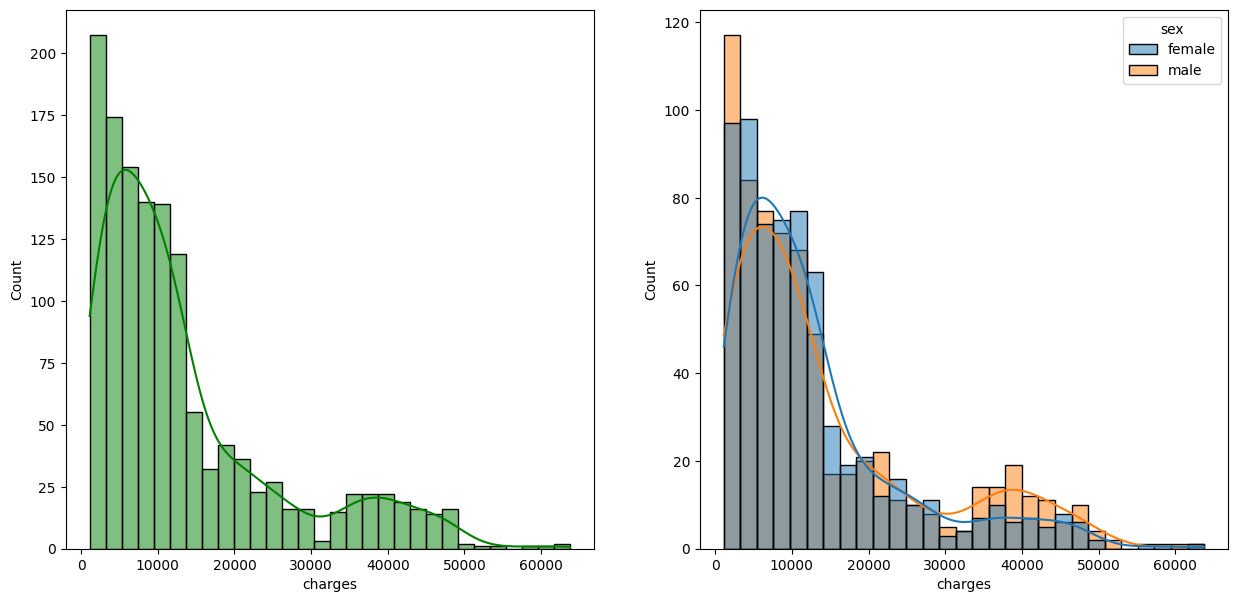

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='charges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='charges',kde=True,hue='sex')
plt.show()

## Insights

--> The distribution of insurance charges is right-skewed, meaning most individuals are charged lower amounts, while a smaller number of individuals incur very high charges. This indicates, we might have to use standardization or normalization.  
--> The majority of charges fall in the range of $0–$15,000, with a sharp decline as the charges increase.  
--> There are a few extreme high values (outliers) above $40,000, which could indicate specific conditions (e.g., high-risk health cases).  

--> Males appear to have slightly higher density in the higher charge ranges ($30,000+), which could suggest that males may incur higher medical expenses in certain cases.


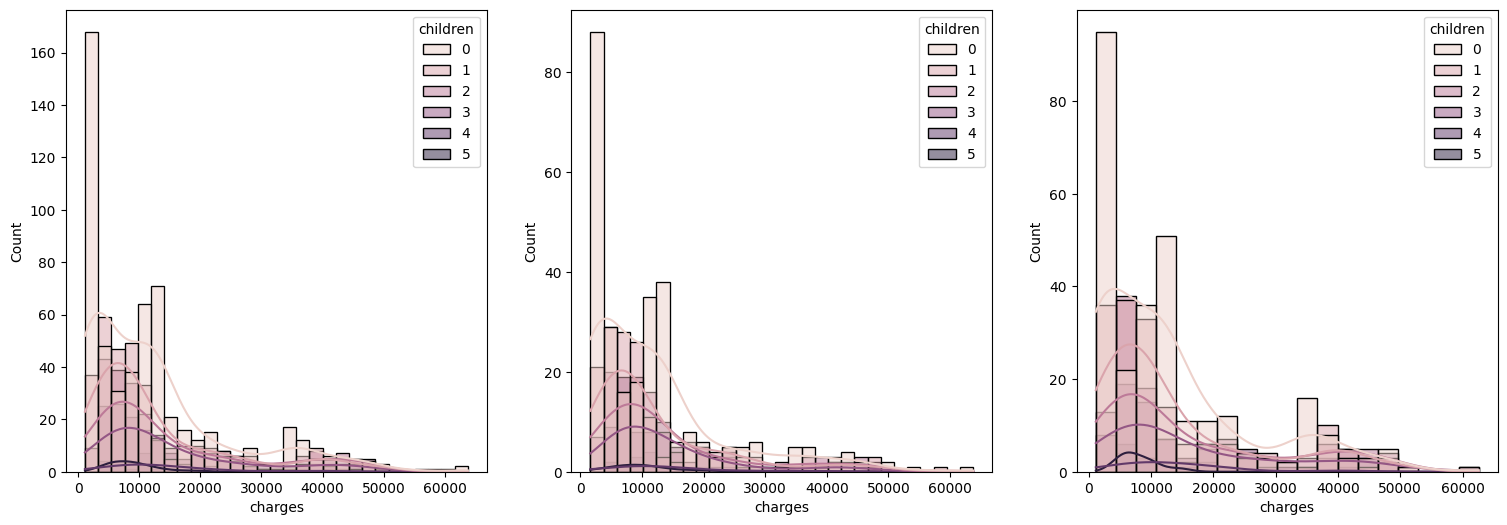

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='charges',kde=True,hue='children')
plt.subplot(142)
sns.histplot(data=df[df.sex=='female'],x='charges',kde=True,hue='children')
plt.subplot(143)
sns.histplot(data=df[df.sex=='male'],x='charges',kde=True,hue='children')
plt.show()

## Insight

--> As the number of children increases, the distribution becomes more spread out with some occurrences in higher charge ranges, suggesting higher medical expenses for families with more children.

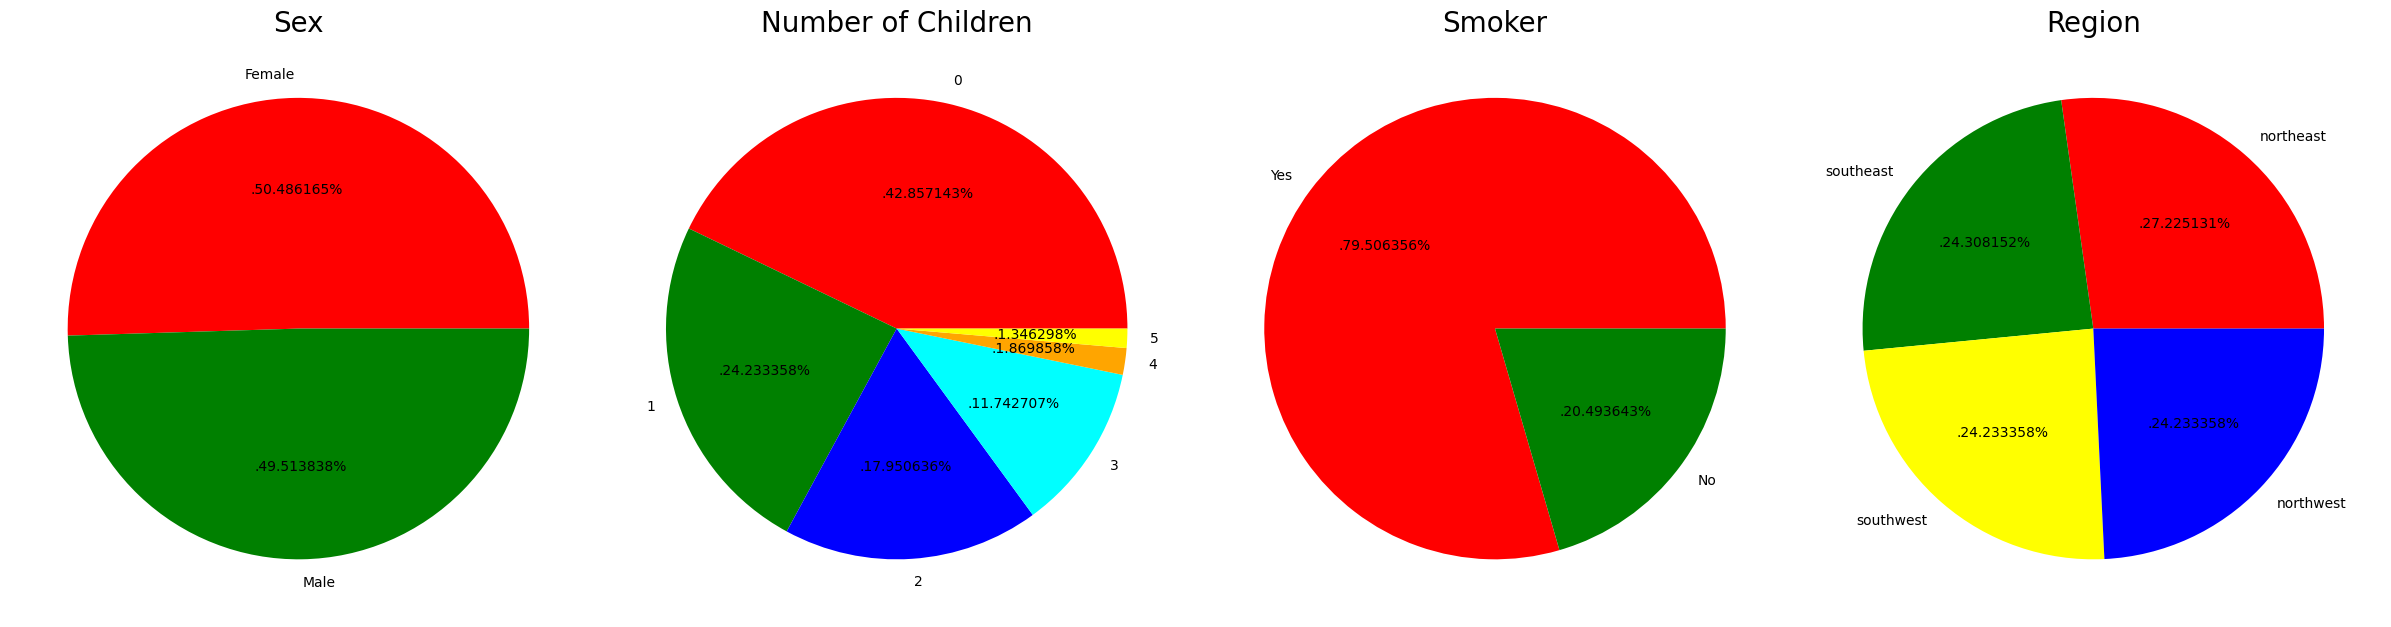

In [25]:
#Multivariate analysis using pie chart

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['children'].value_counts()
labels = '0', '1','2','3','4', '5'
color = ['red', 'green', 'blue', 'cyan','orange','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Number of Children', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['smoker'].value_counts()
labels = 'Yes', 'No'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Smoker', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['region'].value_counts()
labels = 'northeast', 'southeast', 'southwest', 'northwest'
color = ['red', 'green', 'yellow', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Region', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

## Insights

--> The dataset is balanced in terms of gender.  
--> The majority of individuals in the dataset have 0 children. Families with 1 child (24.23%) and 2 children (17.95%) are also well-represented. Fewer individuals have 3 children (11.74%), 4 children (1.86%), or 5 children (1.14%), indicating that large families are rare in the dataset.  
--> A large majority of individuals are non-smokers (79.50%), while only 20.49% are smokers.  
--> The dataset is fairly evenly distributed across the four regions.  


### Determining if sex has impact on an individual's insurance charge

In [26]:
gender_group = df.groupby('sex').mean()
gender_group

,age,bmi,charges
sex,,,
female,39.503021,30.377749,12569.578844
male,38.946667,30.943652,13974.998864


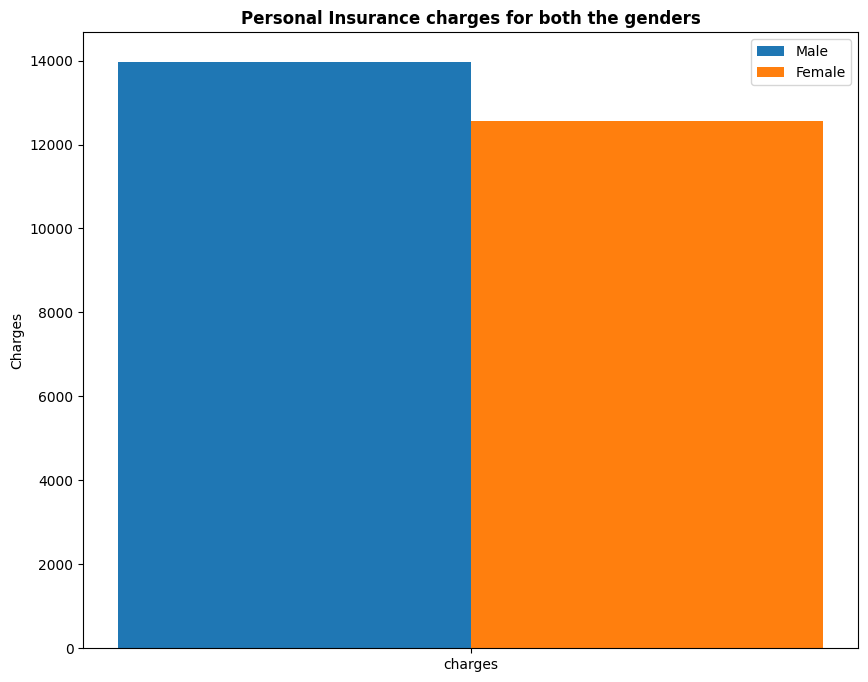

In [27]:
plt.figure(figsize=(10, 8))

X = ['charges']


female_charges = [gender_group['charges'][0]]
male_charges = [gender_group['charges'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_charges, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_charges, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Charges")
plt.title("Personal Insurance charges for both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights

--> On an average, males have slightly higher personal insurance charges.

### Determining if children has impact on an individual's insurance charge

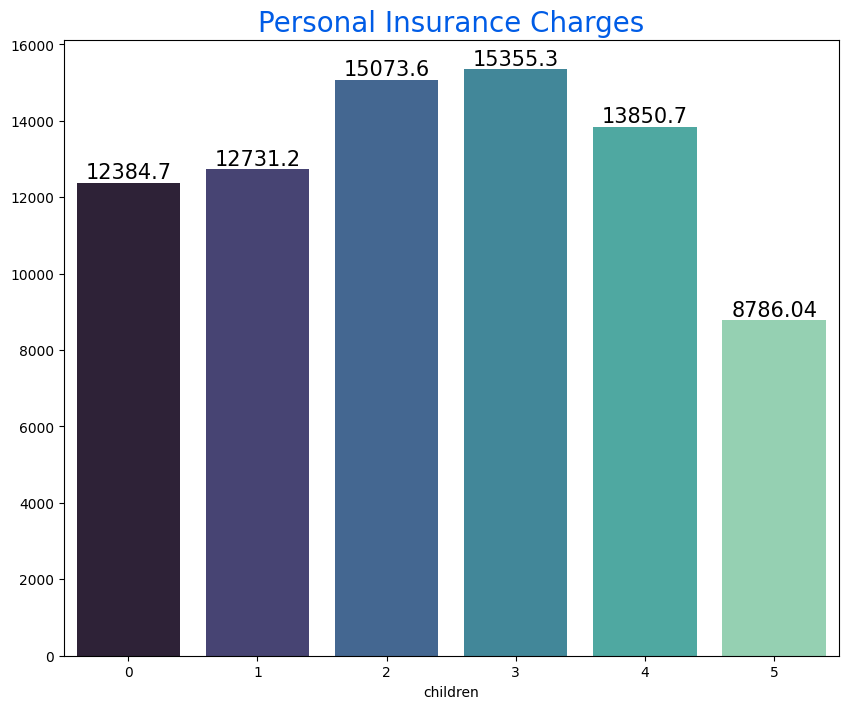

In [36]:
Group_data2 = df.groupby('children')
f, ax = plt.subplots(1, 1, figsize=(10, 8))  # Create only one subplot
sns.barplot(
    x=Group_data2['charges'].mean().index,
    y=Group_data2['charges'].mean().values,
    palette='mako',
    ax=ax
)
ax.set_title('Personal Insurance Charges', color='#005ce6', size=20)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, color='black', size=15)

plt.show()



## Insights

--> Individuals with 3 children have the highest average insurance charges
--> Individuals with 5 or more children have the lowest average insurance charges. However, this could be due to data sparsity. To fix this class imbalance problem, we can use techniques like SMOTE to generate synthetic samples by interpolating between existing data points.

### Determining if being a smoker has impact on an individual's insurance charge 

In [40]:
smoker_group = df.groupby('smoker').mean()
smoker_group

,age,bmi,charges
smoker,,,
no,39.404516,30.651853,8440.660307
yes,38.514599,30.708449,32050.231832


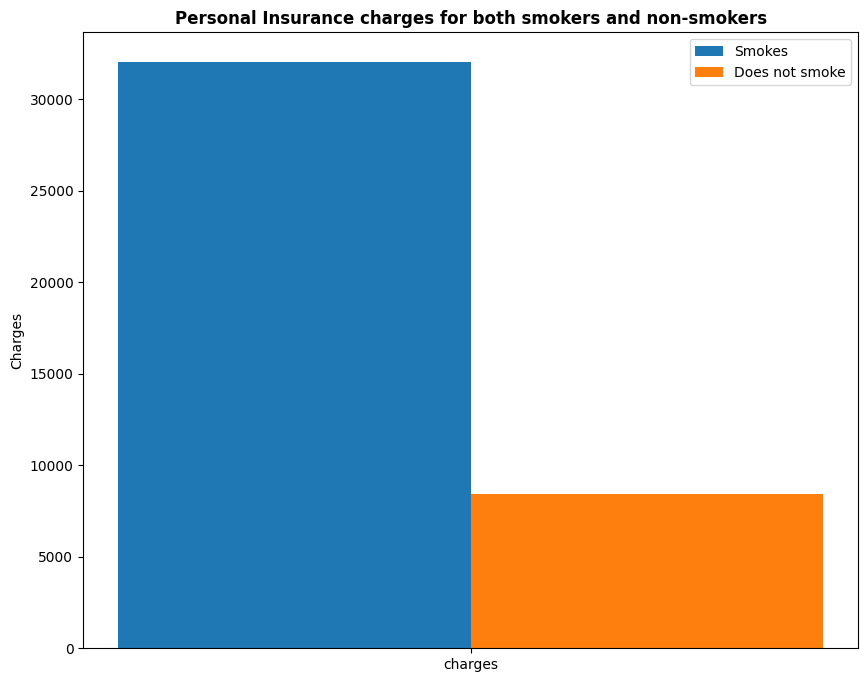

In [41]:
plt.figure(figsize=(10, 8))

X = ['charges']


smoker_charges = [smoker_group['charges'][1]]
non_smoker_charges = [smoker_group['charges'][0]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, smoker_charges, 0.4, label = 'Smokes')
plt.bar(X_axis + 0.2, non_smoker_charges, 0.4, label = 'Does not smoke')
  
plt.xticks(X_axis, X)
plt.ylabel("Charges")
plt.title("Personal Insurance charges for both smokers and non-smokers", fontweight='bold')
plt.legend()
plt.show()

### Insights

The Personal Insurance Charges for smokers is significantly greater than for those who do not smoke

### Determining if US region has impact on an individual's insurance charge 

In [42]:
region_group = df.groupby('region').mean()
region_group

,age,bmi,charges
region,,,
northeast,39.268519,29.173503,13406.384516
northwest,39.259259,29.195494,12450.840844
southeast,38.939560,33.355989,14735.411438
southwest,39.455385,30.596615,12346.937377


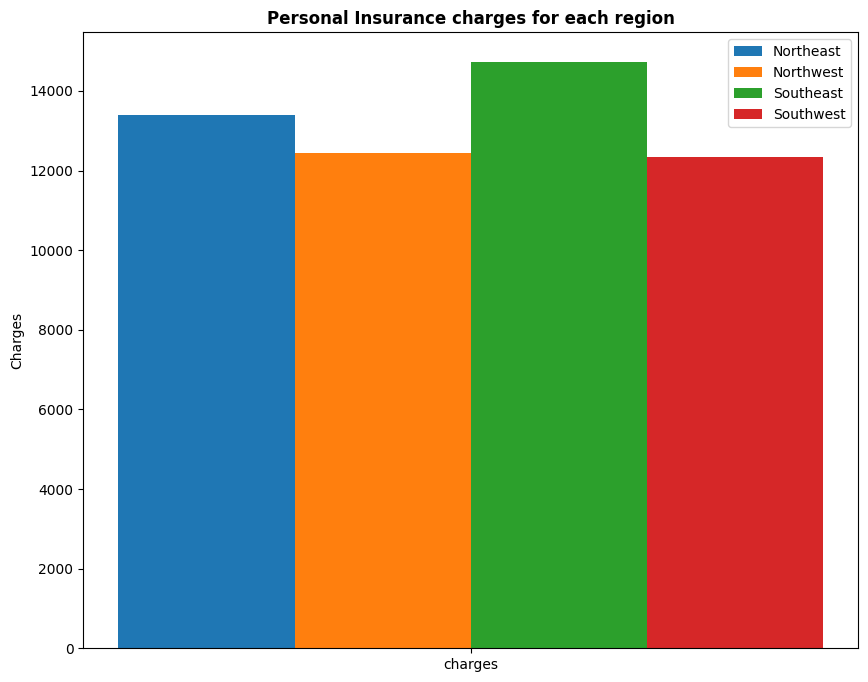

In [45]:
plt.figure(figsize=(10, 8))

X = ['charges']


ne_charges = [region_group['charges'][0]]
nw_charges = [region_group['charges'][1]]
se_charges = [region_group['charges'][2]]
sw_charges = [region_group['charges'][3]]

X_axis = np.arange(len(X))
bar_width = 0.1
  
plt.bar(X_axis - 1.5 * bar_width, ne_charges, bar_width, label='Northeast')
plt.bar(X_axis - 0.5 * bar_width, nw_charges, bar_width, label='Northwest')
plt.bar(X_axis + 0.5 * bar_width, se_charges, bar_width, label='Southeast')
plt.bar(X_axis + 1.5 * bar_width, sw_charges, bar_width, label='Southwest')
  
plt.xticks(X_axis, X)
plt.ylabel("Charges")
plt.title("Personal Insurance charges for each region", fontweight='bold')
plt.legend()
plt.show()

## Insights

--> The regions does have an impact on the PI charges paid by an individual.  
--> People living in the Southeast region tend to pay higher PI charges, whereas people living in the Southwest region tend to pay the least PI charges

### Checking for outliers

<AxesSubplot:>

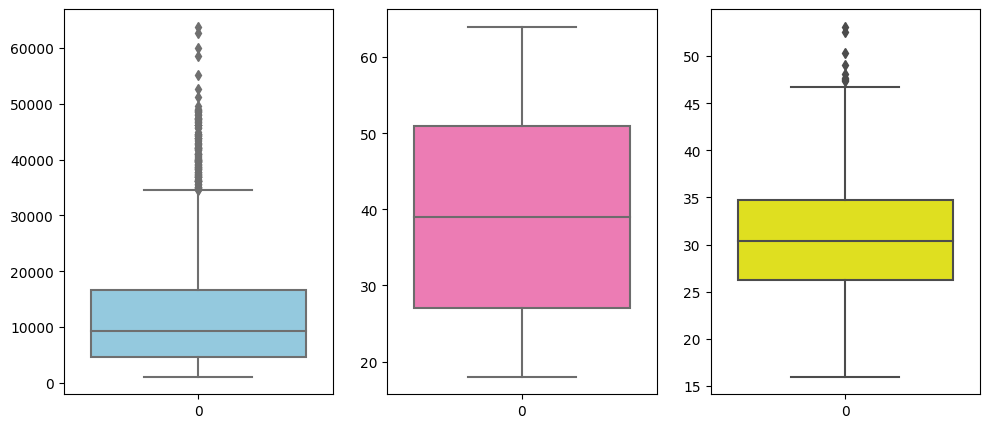

In [50]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['charges'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['age'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['bmi'],color='yellow')



## Insights

--> THe target column has outliers. However, these outliers are valid data points and cannot be just discarded.  
--> We need to use models that are less sensitive to outliers for our prediction such as decision trees, random forest etc

 # MUTIVARIATE ANALYSIS USING PAIRPLOT

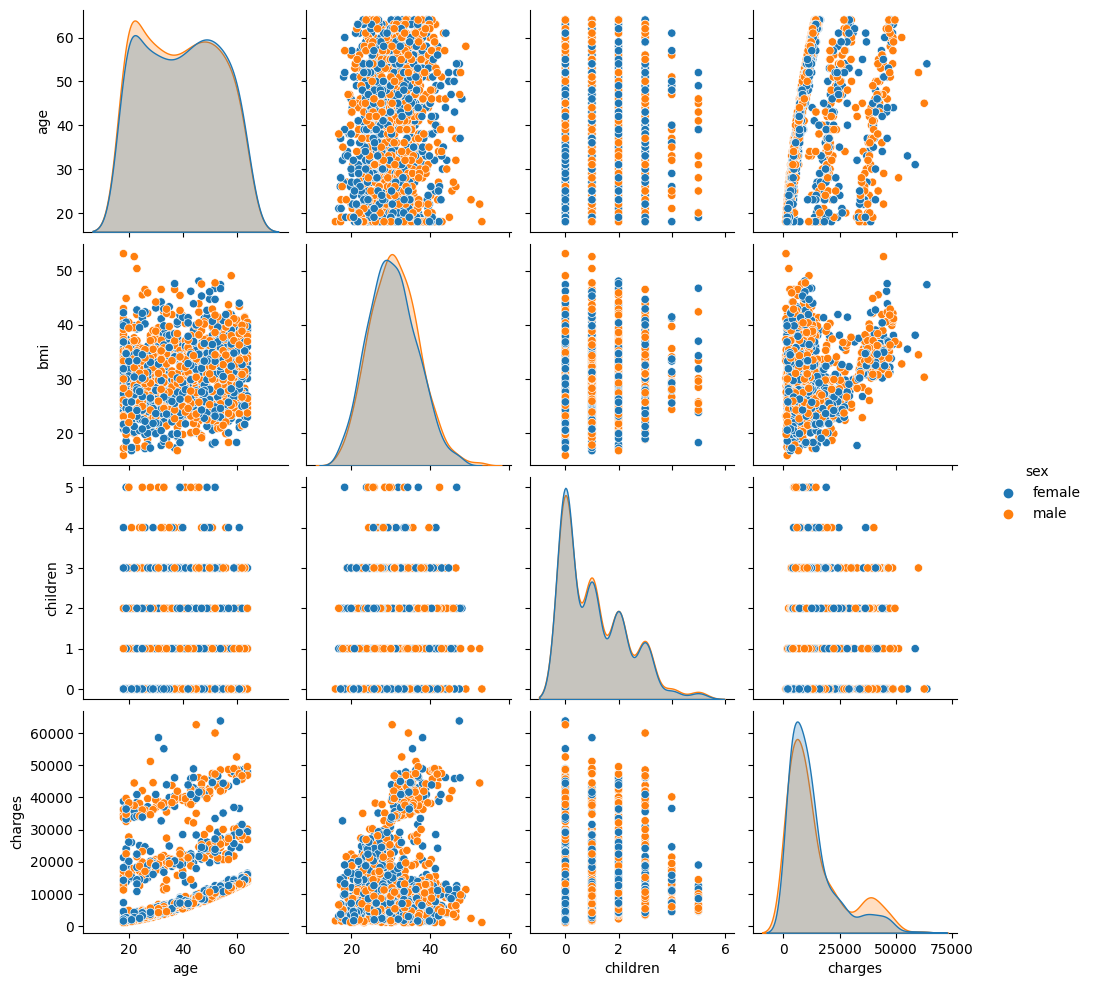

In [51]:
sns.pairplot(df,hue = 'sex')
plt.show()

# Conclusions:

1. The Personal Insurance Charges are affected by each of the feature column present in the dataset.
2. Charges are slightly higher for male individuals compared to females.
3. Charges for smokers is significantly higher
4. As number of children increases, the PI charges tend to increase as well